# <p style="text-align:center">Classification</p>

## Libraries import

In [436]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.cross_validation import KFold


import os
import subprocess
import sklearn.metrics
from sklearn import svm
from sklearn import tree
from os import system
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.cross_validation import cross_val_score  
from sklearn.grid_search import GridSearchCV     #Hyper-parameters
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from IPython.display import Image
from pandas import read_csv, DataFrame
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
print(__doc__)

%matplotlib inline

Automatically created module for IPython interactive environment


#### File loading. We load the file (TrafficViolations.csv)

In [340]:
train = pd.read_csv('/Users/P/Desktop/TrafficViolations.csv')

In [341]:
null_data = train[train.isnull().any(axis=1)]
null_data.shape

(12, 18)

In [342]:
train.dropna(inplace=True)

In [343]:
train.shape

(28959, 18)

In [344]:
target = train['Damage.Class']
target.shape

(28959,)

## Target mapping to numeric

In [345]:
target_map = {'Class 1': 0, 'Class 2': 1, 'Class 3': 2}
target = target.map(target_map)

In [440]:
target.head()

0    0
1    1
2    2
3    0
4    0
Name: Damage.Class, dtype: int64

In [347]:
target.isnull().values.any()

False

In [348]:
train.columns

Index([u'Date Of Stop', u'Time Of Stop', u'Description', u'Belts',
       u'Personal Injury', u'Property Damage', u'Fatal', u'Commercial License',
       u'HAZMAT', u'Commercial Vehicle', u'Work Zone', u'VehicleType',
       u'Violation Type', u'Contributed To Accident', u'Race', u'Gender',
       u'Arrest Type', u'Damage.Class'],
      dtype='object')

### Selecting features

In [425]:
features = ['Time Of Stop', 'Belts', 'Personal Injury', 'Property Damage',
            'VehicleType','Commercial License','Fatal'] 
            #to be completed  arrest type, personal injury , property damage 
            #, contribute to accident                        
train = train[features]

## Function to convert feature values to numeric

In [426]:
#This function asumes the training set it is stored in variable named 'train'
for(train_name, train_series) in train.iteritems():
    if train_series.dtype == 'O':
        train[train_name], tmp_indexer = pd.factorize(train[train_name])
    else:
         #for int or float: fill NaN
        tmp_len = len(train[train_series.isnull()])
        if tmp_len>0:
            #print "mean", train_series.mean()
            train.loc[train_series.isnull(), train_name] = -999

In [351]:
## Train test split

In [352]:
X_train, X_test, y_train, y_test = train_test_split(train, target, train_size=.66, random_state=0)

In [353]:
X_train.shape

(19112, 7)

In [354]:
y_train.shape

(19112,)

In [394]:
X_test.shape

(9847, 7)

1. feature 4 (0.556146)
2. feature 0 (0.278909)
3. feature 5 (0.047499)
4. feature 3 (0.040319)
5. feature 1 (0.034653)
6. feature 2 (0.030579)
7. feature 6 (0.011894)


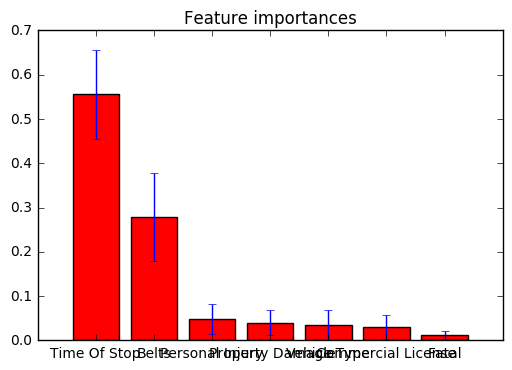

In [371]:
for f in range(X_train.shape[1]):
    
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), features)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### MulrinomiL Logistic Regression

In [437]:
logreg = linear_model.LogisticRegression(C=1.0)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [438]:
#Training Accuracy
logreg_predict =logreg.predict(X_train)
logreg_accuracy = accuracy_score(y_train,logreg_predict)
logreg_accuracy

0.43234616994558395

In [439]:
#Test Accuracy
logreg_predict =logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_predict)
logreg_accuracy

0.4354625774347517



### Decision Tree Classification

In [401]:
# Model fitting
dtc = DecisionTreeClassifier(min_samples_split=2, max_depth=None, random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [444]:
#Training Accuracy
dtc_train_predict = dtc.predict(X_train)
dtc_train_accuracy = accuracy_score(y_train, dtc_train_predict)
dtc_train_accuracy

0.44971745500209293

In [357]:
#Test Accuracy
dtc_test_predict = dtc.predict(X_test)
dtc_test_accuracy = accuracy_score(y_test, dtc_test_predict)
dtc_test_accuracy

0.43160353407129076

## Tree

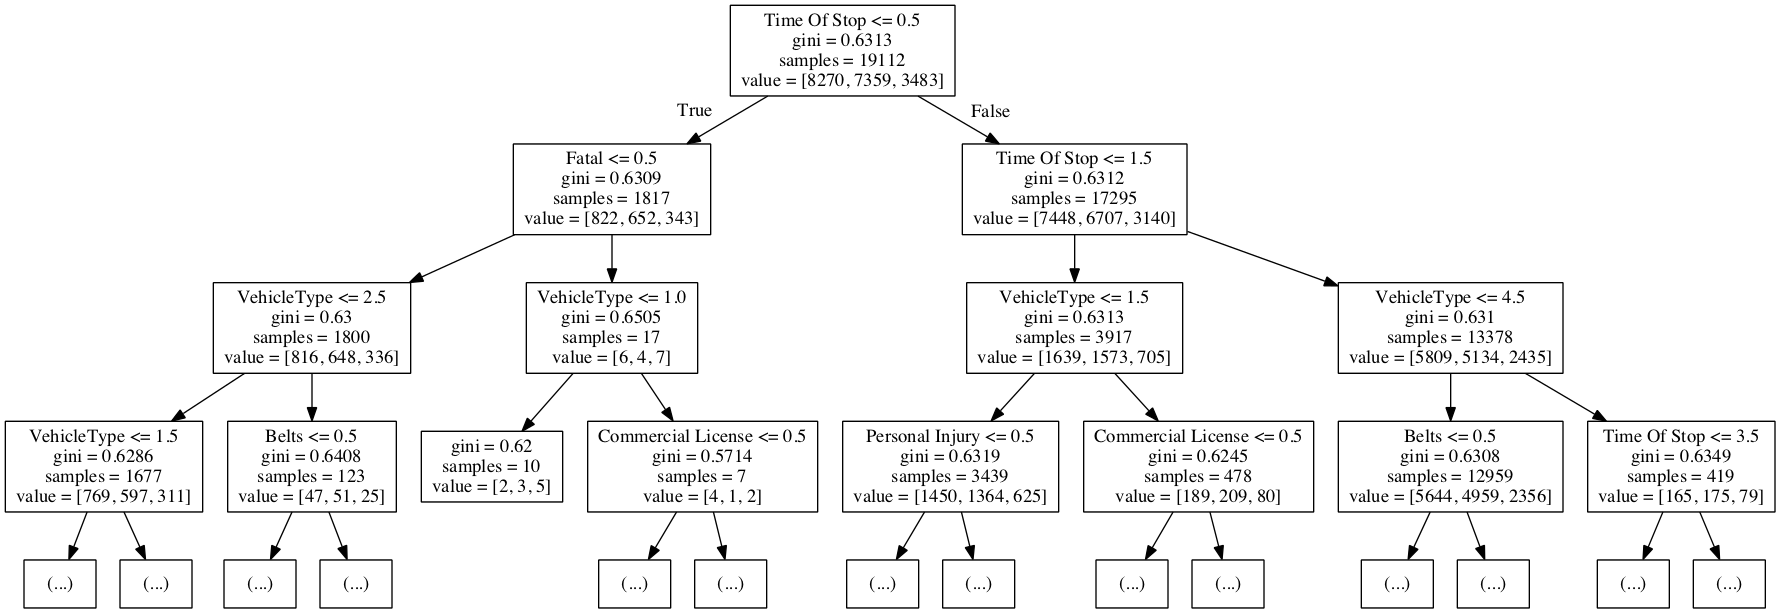

In [358]:
export_graphviz(dtc, max_depth=3, feature_names=X_train.columns)
!dot -Tpng tree.dot -o decision.png
from IPython.display import Image
Image("decision.png", unconfined=True)

### Random Forest Classification

In [359]:
# Classifier instantiation
rfc = RandomForestClassifier()

In [360]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [361]:
#Training Accuracy
rfc_train_predict = rfc.predict(X_train)
rfc_train_accuracy = accuracy_score(y_train, rfc_train_predict)
rfc_train_accuracy

0.44877563834240269

In [362]:
#Test Accuracy
rfc_test_predict = rfc.predict(X_test)
rfc_test_accuracy = accuracy_score(y_test, rfc_test_predict)
rfc_test_accuracy

0.42936935107139229

## Plot of accuracy based on Random Forest Trees

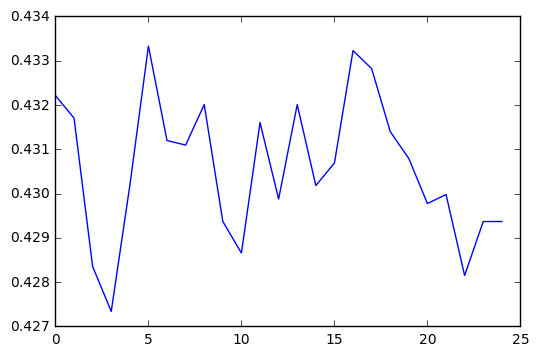

In [364]:
trees=range(25)
accuracy=np.zeros(25)
for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=idx+1)
    classifier=classifier.fit(X_train, y_train)
    predictions=classifier.predict(X_test)
    accuracy[idx]=sklearn.metrics.accuracy_score(y_test, predictions)
plt.cla()
plt.plot(trees,accuracy)

## Feature Importance Value plot

[ 0.25693075  0.05623373  0.03448295  0.04038976  0.54148882  0.05707115
  0.01340283]


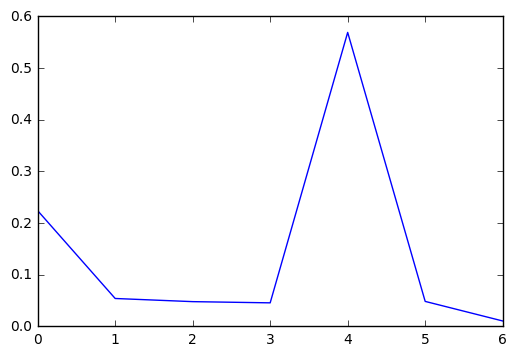

In [404]:
print(rfc.feature_importances_)
plt.plot(rfe.feature_importances_)

### Extremely Randomized Tree

In [475]:
#Fitting the Model
ert = ExtraTreesClassifier(n_estimators=50, max_depth=None,min_samples_split=2, random_state=0)
ert.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [ ]:
#Predicting Training Accuracy
ert_train_predict = ert.predict(X_train)
ert_train_accuracy = accuracy_score(y_train, ert_train_predict)
ert_train_accuracy

In [368]:
#Test Accuracy
ert_test_predict = ert.predict(X_test)
ert_test_accuracy = accuracy_score(y_test, ert_test_predict)
ert_test_accuracy

0.4317050878440134

## Plot of accuracy based on Extremely Randomized Tree

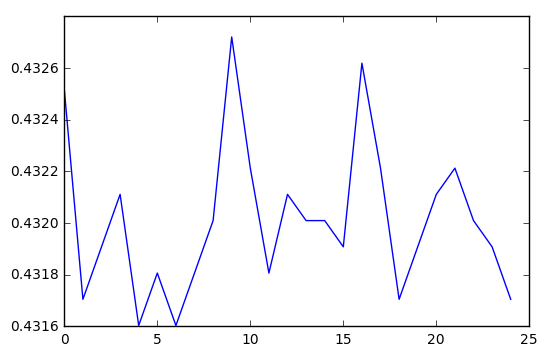

In [374]:
trees=range(25)
accuracy=np.zeros(25)
for idx in range(len(trees)):
    classifier=ExtraTreesClassifier(n_estimators=idx+1)
    classifier=classifier.fit(X_train, y_train)
    predictions=classifier.predict(X_test)
    accuracy[idx]=sklearn.metrics.accuracy_score(y_test, predictions)
plt.cla()
plt.plot(trees,accuracy)

## Feature Importance Value Plot

[ 0.27890912  0.03465286  0.03057919  0.04031941  0.55614579  0.04749929
  0.01189434]


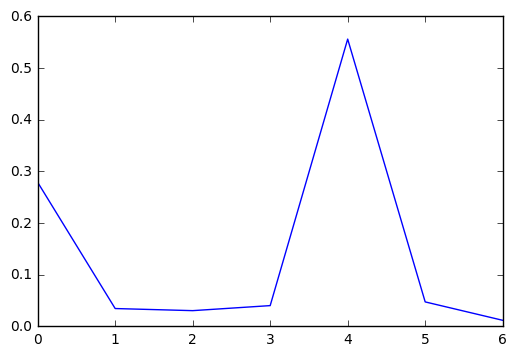

In [370]:
print(ert.feature_importances_)
plt.plot(ert.feature_importances_)

## Support Vector Machine

In [429]:
clf = svm.SVC()

In [389]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [390]:
clf_train_predict = clf.predict(X_train)

In [391]:
clf_train_accuracy = accuracy_score(y_train, clf_train_predict)
clf_train_accuracy

0.43721222268731685

In [392]:
clf.fit(X_test, y_test)
clf_test_predict = clf.predict(X_test)

In [393]:
clf_test_accuracy = accuracy_score(y_test, clf_test_predict)
clf_test_accuracy

0.44490707829795878

### Support Vector Machine using Cross Validation

In [75]:
r_scores = cross_val_score(clf, train, target, cv=10, scoring='accuracy')
# print r_scores
r_scores = round(r_scores.mean() * 100, 2)
print "Cross-Validation (kfold=10) - Accuracy: {}%".format(r_scores)

Cross-Validation (kfold=10) - Accuracy: 43.41%


## BAGGING

In [88]:
#BaggingClassifier
ensemble = BaggingClassifier(base_estimator=ExtraTreesClassifier(),
                             bootstrap=True,
                             bootstrap_features=False,
                             oob_score=True)
ensemble.fit(X_train, y_train)

BaggingClassifier(base_estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [405]:
#Training Accuracy
bag_predict =ensemble.predict(X_train)
bag_accuracy = accuracy_score(y_train,bag_predict)
bag_accuracy

0.44888028463792384

In [406]:
#Test Accuracy
bag_predict =ensemble.predict(X_test)
bag_accuracy = accuracy_score(y_test,bag_predict)
bag_accuracy

0.42947090484411493

## BOOSTING

In [194]:
#AdA boosting
abc = AdaBoostClassifier(ExtraTreesClassifier())
abc.fit(X_train, y_train)

0.44971745500209293

In [ ]:
#Training Accuracsy
abc_predict=abc.predict(X_train)
abc_train_accuracy=accuracy_score(y_train, abc_predict)
abc_train_accuracy

In [195]:
# Test Accuracy
abc_predict=abc.predict(X_test)
abc_test_accuracy=accuracy_score(y_test, abc_predict)
abc_test_accuracy

0.43018178125317358

In [407]:
#Gradient Boosting
clf = GradientBoostingClassifier().fit(X_train, y_train)
clf.score(X_test, y_test) 

0.43241596425307199

## Comparing Algorithms - Using Boxplot

LR: 0.431875 (0.011159)
CART: 0.425282 (0.012027)
Random: 0.423764 (0.014172)
extraTree: 0.425072 (0.012072)
SVM: 0.434125 (0.011260)


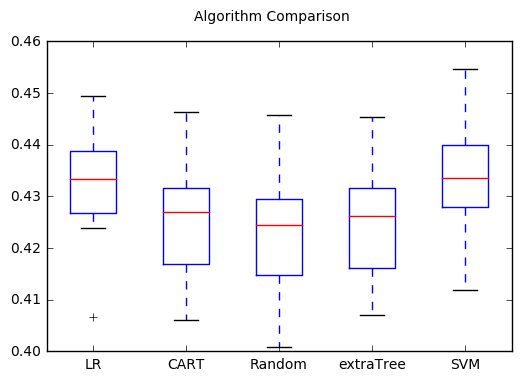

In [428]:
# prepare configuration for cross validation test harness
num_folds = 10
num_instances = len(X)
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('Random', RandomForestClassifier()))
models.append(('extraTree', ExtraTreesClassifier()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
	cv_results = cross_validation.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Model Comparison based on Voting

In [472]:
clf1 = LogisticRegression(random_state=1)
clf2= DecisionTreeClassifier()
clf3 = RandomForestClassifier(random_state=1)
clf4 = ExtraTreesClassifier()
clf5= SVC(kernel='rbf', probability=True)


In [474]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('dtree', clf2), ('Extra_tree', clf3),('dtree', clf4),('SVM', clf4)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4,clf5, eclf], ['Logistic Regression', 'Random Forest', 'Extra_tree', 'dtree','SVM']):
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

 

Accuracy: 0.43 (+/- 0.00) [Logistic Regression]
Accuracy: 0.43 (+/- 0.00) [Random Forest]
Accuracy: 0.42 (+/- 0.00) [Extra_tree]
Accuracy: 0.43 (+/- 0.00) [dtree]
Accuracy: 0.43 (+/- 0.00) [SVM]
